# __Visualisations from cleaned data:__<br>

 - Necessary further price cleaning<br>
 - Divide dataframe into numerical, boolean and categorical variables<br>
 - Price correlations of categorical variables<br>
     - Data overview<br>
     - Data preparation<br>
     - Visual creation<br>
 - Price correlations of numerical variables<br>
     - Data overview<br>
     - Visual creation<br>
 - Price correlations of boolean variables<br>
     - Data overview<br>
     - Data preparation<br>
     - Visual creation<br>

In [132]:
import pandas as pd
import matplotlib
import seaborn as sns
from pandas.api.types import infer_dtype
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('../csv_files/cleaned_properties.csv', low_memory = False, index_col = 0)

print(df.info(),'\n')

print('Inferred datatypes:\n',df.apply(infer_dtype),'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68788 entries, 0 to 70123
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   locality           44275 non-null  float64
 1   house_is           57568 non-null  object 
 2   property_subtype   62872 non-null  object 
 3   price              68530 non-null  object 
 4   sale               10551 non-null  object 
 5   rooms_number       68528 non-null  float64
 6   area               64288 non-null  float64
 7   kitchen_has        58837 non-null  float64
 8   furnished          57067 non-null  float64
 9   open_fire          63266 non-null  float64
 10  terrace            49486 non-null  float64
 11  terrace_area       39066 non-null  float64
 12  garden             60972 non-null  float64
 13  garden_area        40211 non-null  float64
 14  land_surface       30696 non-null  float64
 15  land_plot_surface  35673 non-null  object 
 16  facades_number     572

## __Necessary further price cleaning__

In [135]:
df['price'] = df['price'].replace(1, np.nan).replace(2, np.nan)
df['price'] = df['price'].apply(lambda x: np.nan if x < 50000 else x)

TypeError: '<' not supported between instances of 'str' and 'int'

In [136]:
df.columns

Index(['locality', 'house_is', 'property_subtype', 'price', 'sale',
       'rooms_number', 'area', 'kitchen_has', 'furnished', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'land_surface',
       'land_plot_surface', 'facades_number', 'swimming_pool_has',
       'building_state', 'region'],
      dtype='object')

## __Divide dataframe into numerical, boolean and categorical variables__

In [116]:
df_numerical = df[['price', 'area', 'terrace_area', 'garden_area', 'land_surface', 'land_plot_surface']].copy()
df_boolean = df[['price', 'region', 'open_fire', 'terrace', 'house_is',
         'swimming_pool_has', 'kitchen_has', 'furnished', 'garden']].copy()
df_categorical = df[['price', 'region', 'house_is', 'property_subtype', 'facades_number', 'building_state', 'rooms_number']].copy()

## __Price correlations of categorical variables__

### Data overview

In [117]:
print(df_categorical.info(),'\n')

print('Inferred datatypes:\n',df_categorical.apply(infer_dtype),'\n')

uniques = pd.DataFrame()
for col in df_categorical:
    col_uniques = pd.DataFrame({f'{col}_value': df_categorical[f'{col}'].value_counts().index,
                                f'{col}_count': df_categorical[f'{col}'].value_counts().values})
    uniques = pd.concat([uniques, col_uniques], axis = 1)

print('Value counts:')
uniques.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54037 entries, 0 to 54036
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             53562 non-null  float64
 1   region            54037 non-null  object 
 2   house_is          45255 non-null  float64
 3   property_subtype  54037 non-null  object 
 4   facades_number    46219 non-null  float64
 5   building_state    54037 non-null  object 
 6   rooms_number      53784 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.3+ MB
None 

Inferred datatypes:
 price               floating
region                string
house_is            floating
property_subtype      string
facades_number      floating
building_state        string
rooms_number        floating
dtype: object 

Value counts:


,price_value,price_count,region_value,region_count,house_is_value,house_is_count,property_subtype_value,property_subtype_count,facades_number_value,facades_number_count,building_state_value,building_state_count,rooms_number_value,rooms_number_count
0,295000.0,694,unknown,20196.0,1.0,24720.0,HOUSE,19174.0,0.0,17138.0,unknown,25177.0,3.0,17567.0
1,199000.0,656,Flanders,18505.0,0.0,20535.0,APARTMENT,13751.0,2.0,13409.0,AS_NEW,12412.0,2.0,14765.0
2,249000.0,656,Wallonia,9826.0,NaN,NaN,unknown,5938.0,4.0,8326.0,GOOD,9559.0,4.0,8808.0
3,299000.0,648,Brussels,5510.0,NaN,NaN,VILLA,3853.0,3.0,6995.0,TO_BE_DONE_UP,2515.0,1.0,4387.0
4,275000.0,645,NaN,NaN,NaN,NaN,APARTMENT_BLOCK,1912.0,1.0,348.0,TO_RENOVATE,2184.0,5.0,3843.0
5,225000.0,628,NaN,NaN,NaN,NaN,MIXED_USE_BUILDING,1711.0,10.0,2.0,JUST_RENOVATED,2047.0,6.0,1759.0
6,395000.0,568,NaN,NaN,NaN,NaN,DUPLEX,1201.0,6.0,1.0,TO_RESTORE,143.0,0.0,935.0
7,325000.0,528,NaN,NaN,NaN,NaN,PENTHOUSE,1078.0,NaN,NaN,NaN,NaN,7.0,669.0
8,195000.0,520,NaN,NaN,NaN,NaN,GROUND_FLOOR,882.0,NaN,NaN,NaN,NaN,8.0,342.0
9,250000.0,493,NaN,NaN,NaN,NaN,MANSION,709.0,NaN,NaN,NaN,NaN,9.0,194.0


### Data preparation

In [118]:
# Change subtype to all smallcaps
df_categorical['property_subtype'] = df_categorical['property_subtype'].str.lower()

# Change - to underscore
df_categorical['property_subtype'].replace('-', '_', inplace = True)

In [119]:
df_categorical['building_state'].replace('TO_BE_DONE_UP', 'TO_RENOVATE', inplace = True)
df_categorical['building_state'].replace('TO_RESTORE', 'TO_RENOVATE', inplace = True)

### Visual 1

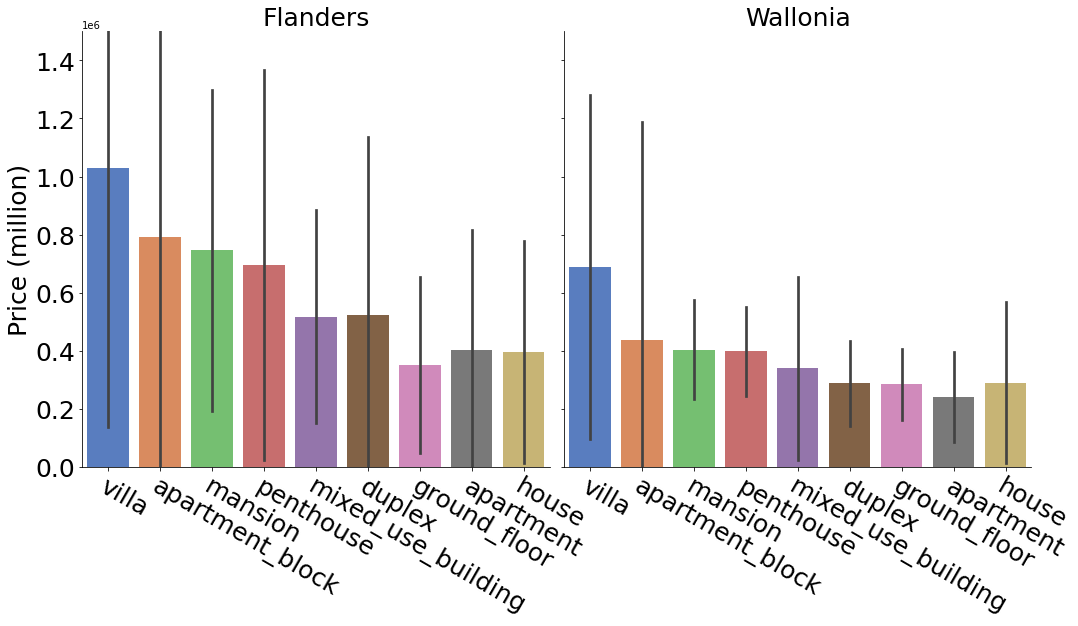

In [121]:
g = sns.FacetGrid(df_categorical, col="region",
                  col_order = ['Flanders', 'Wallonia'], height=7)

g.map(sns.barplot, 'property_subtype', 'price', alpha=1,
     order = ['villa', 'apartment_block', 'mansion', 'penthouse',
                     'mixed_use_building', 'duplex', 'ground_floor',
                     'apartment', 'house'], palette="muted", ci = 'sd')

g.set(ylim=(0, 1500000))
g.axes[0,0].set_ylabel('Price (million)', fontsize = 25)
g.axes[0,0].set_xlabel('')
g.axes[0,1].set_xlabel('')
g.axes[0,0].set_title('Flanders', fontsize=25)
g.axes[0,1].set_title('Wallonia', fontsize=25)


g.axes[0,0].tick_params(axis='x', which='major', labelsize = 25)
g.axes[0,1].tick_params(axis='x', which='major', labelsize = 25)
g.axes[0,0].tick_params(axis='y', which='major', labelsize = 25)
plt.setp(g.axes[0,0].xaxis.get_majorticklabels(), rotation=-30, ha="left", rotation_mode="anchor")
plt.setp(g.axes[0,1].xaxis.get_majorticklabels(), rotation=-30, ha="left", rotation_mode="anchor")

plt.savefig("./pictures/property_subtype_cor_by_region.png", transparent=True)

plt.show()

### Visual 2

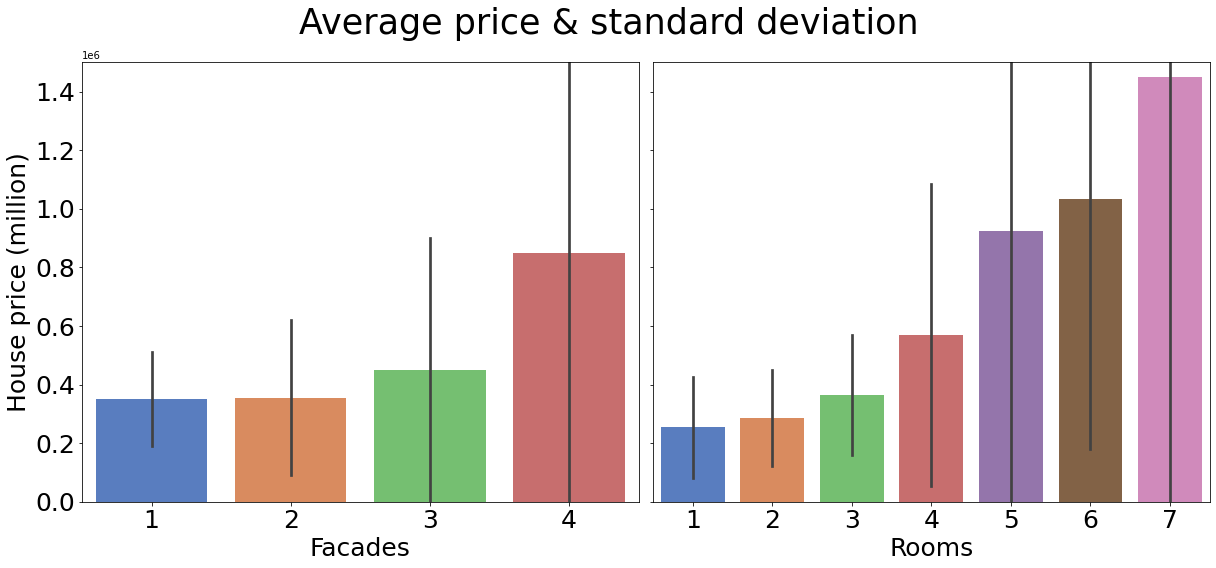

In [130]:
house_mask = df_categorical.house_is == 1
house_flanders_mask = house_mask & (df_categorical.region == 'Flanders')

fig1, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(17,8))

sns.barplot(x='facades_number', y='price',
               data=df_categorical[house_flanders_mask], palette="muted",
               ax=ax1, ci = 'sd', order = [1, 2, 3, 4])
sns.barplot(x='rooms_number', y='price',
               data=df_categorical[house_flanders_mask], palette="muted",
               ax=ax2, ci = 'sd', order = [1, 2, 3, 4, 5, 6, 7])

for ax in (ax1, ax2):
    ax.set_ylabel('')
    ax.tick_params(axis='x', which='major', labelsize = 'xx-large')
    ax.tick_params(axis='y', which='major', labelsize = 'xx-large')

ax1.axis([None, None, 0, 1500000])
ax1.set_ylabel('House price (million)', fontsize = '25')

ax2.set_ylabel('', fontsize = 'xx-large')

ax1.set_xlabel('Facades', fontsize = '25')
ax2.set_xlabel('Rooms', fontsize = '25')
ax1.tick_params(axis='both', which='major', labelsize = 25)
ax2.tick_params(axis='both', which='major', labelsize = 25)

fig1.suptitle('Average price & standard deviation', fontsize=35)
     
plt.tight_layout()

plt.savefig("./pictures/facades_rooms_cor_house_flanders.png", transparent=True)

plt.show()

## __Price correlations of numerical variables__

### Data overview

In [123]:
print(df_numerical.info(),'\n')

print('Inferred datatypes:\n',df_numerical.apply(infer_dtype),'\n')

uniques = pd.DataFrame()
for col in df_numerical:
    col_uniques = pd.DataFrame({f'{col}_value': df_numerical[f'{col}'].value_counts().index,
                                f'{col}_count': df_numerical[f'{col}'].value_counts().values})
    uniques = pd.concat([uniques, col_uniques], axis = 1)

print('Value counts:')
uniques.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54037 entries, 0 to 54036
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              53562 non-null  float64
 1   area               47633 non-null  float64
 2   terrace_area       15034 non-null  float64
 3   garden_area        7116 non-null   float64
 4   land_surface       16212 non-null  float64
 5   land_plot_surface  29245 non-null  float64
dtypes: float64(6)
memory usage: 2.9 MB
None 

Inferred datatypes:
 price                floating
area                 floating
terrace_area         floating
garden_area          floating
land_surface         floating
land_plot_surface    floating
dtype: object 

Value counts:


,price_value,price_count,area_value,area_count,terrace_area_value,terrace_area_count,garden_area_value,garden_area_count,land_surface_value,land_surface_count,land_plot_surface_value,land_plot_surface_count
0,295000.0,694.0,150.0,954.0,20.0,893.0,100.0,243.0,100.0,193.0,100.0,353
1,199000.0,656.0,120.0,932.0,10.0,834.0,50.0,180.0,150.0,174.0,90.0,313
2,249000.0,656.0,100.0,891.0,15.0,749.0,200.0,164.0,200.0,154.0,120.0,291
3,299000.0,648.0,90.0,827.0,8.0,675.0,300.0,158.0,300.0,149.0,70.0,290
4,275000.0,645.0,160.0,808.0,6.0,626.0,500.0,134.0,120.0,136.0,80.0,289
5,225000.0,628.0,200.0,757.0,30.0,624.0,400.0,133.0,400.0,128.0,110.0,263
6,395000.0,568.0,140.0,749.0,12.0,576.0,150.0,132.0,1000.0,127.0,150.0,256
7,325000.0,528.0,180.0,718.0,25.0,538.0,60.0,124.0,250.0,126.0,85.0,223
8,195000.0,520.0,80.0,713.0,4.0,467.0,30.0,117.0,500.0,117.0,75.0,210
9,250000.0,493.0,110.0,703.0,9.0,465.0,250.0,112.0,50.0,114.0,200.0,201


### Data preparation

In [124]:
# replace 0 or 1 m² with np.nan
df_numerical = df_numerical.applymap(lambda x: np.nan if x == 0 or x == 1 else x)

### Visual 3

/home/philippe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


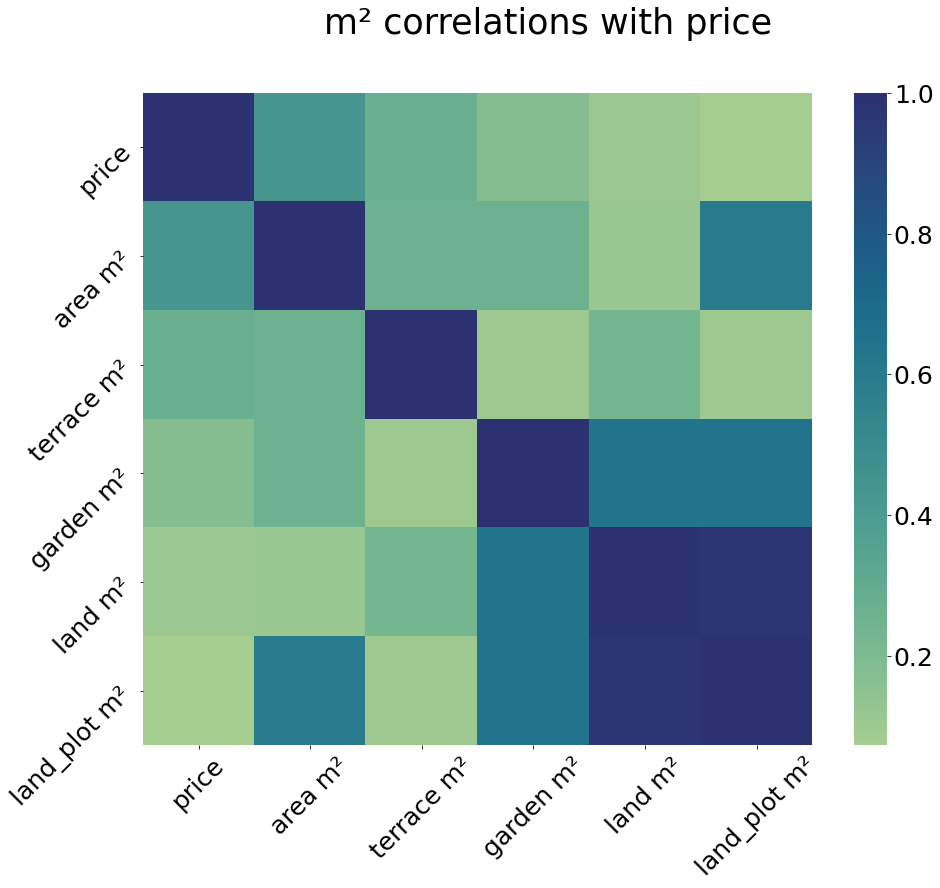

In [125]:
labels = ['price', 'area m²', 'terrace m²', 'garden m²', 'land m²', 'land_plot m²']
corr = df_numerical.corr()
 
# Heatmap
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(corr, xticklabels = labels, yticklabels = labels, cmap = 'crest')
#ax.tick_params(axis='both', which='major', labelsize = 'xx-large')
ax.figure.axes[-2].set_xticklabels(labels, rotation = 45, fontsize = 25)
ax.figure.axes[-2].set_yticklabels(labels, rotation = 45, fontsize = 25)
ax.figure.axes[-1].set_yticklabels(ax.figure.axes[-1].get_yticklabels(), fontsize = 25)

fig.suptitle('m² correlations with price', fontsize=35)

plt.savefig("./pictures/area_cor.png", transparent=True)

## __Price correlations of boolean variables__

### Data overview

In [126]:
print(df_boolean.info(),'\n')

print('Inferred datatypes:\n',df_boolean.apply(infer_dtype),'\n')

uniques = pd.DataFrame()
for col in df_boolean:
    col_uniques = pd.DataFrame({f'{col}_value': df_boolean[f'{col}'].value_counts().index,
                                f'{col}_count': df_boolean[f'{col}'].value_counts().values})
    uniques = pd.concat([uniques, col_uniques], axis = 1)

print('Value counts:')
uniques.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54037 entries, 0 to 54036
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              53562 non-null  float64
 1   region             54037 non-null  object 
 2   open_fire          48602 non-null  float64
 3   terrace            38499 non-null  float64
 4   house_is           45255 non-null  float64
 5   swimming_pool_has  42065 non-null  float64
 6   kitchen_has        48086 non-null  float64
 7   furnished          42389 non-null  float64
 8   garden             46719 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.1+ MB
None 

Inferred datatypes:
 price                floating
region                 string
open_fire            floating
terrace              floating
house_is             floating
swimming_pool_has    floating
kitchen_has          floating
furnished            floating
garden               floating
dtype: object 

,price_value,price_count,region_value,region_count,open_fire_value,open_fire_count,terrace_value,terrace_count,house_is_value,house_is_count,swimming_pool_has_value,swimming_pool_has_count,kitchen_has_value,kitchen_has_count,furnished_value,furnished_count,garden_value,garden_count
0,295000.0,694,unknown,20196.0,0.0,45458.0,1.0,22212.0,1.0,24720.0,0.0,40599.0,1.0,39185.0,0.0,36600.0,0.0,31313.0
1,199000.0,656,Flanders,18505.0,1.0,3144.0,0.0,16287.0,0.0,20535.0,1.0,1466.0,0.0,8901.0,1.0,5789.0,1.0,15406.0
2,249000.0,656,Wallonia,9826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,299000.0,648,Brussels,5510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,275000.0,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,225000.0,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,395000.0,568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,325000.0,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,195000.0,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,250000.0,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data preparation

In [127]:
# change garden values >1 to Yes
df_boolean['garden'].apply(lambda x: 1 if x > 1 else x)

## Make contents a display friendly Has/Has not
# change 0.0 to Has not, 1.0 to Has and unknown to NaN
df_boolean_without_price = df_boolean.iloc[:,1:]
df_boolean_without_price = df_boolean_without_price.replace({'unknown': np.nan, 0: 'Has not', 1: 'Has', 'False': 'Has not', 'True': 'Has'})
df_boolean = pd.concat([df_boolean['price'], df_boolean_without_price], axis = 1)

## Melt the dataframe

In [128]:
# For joint house/apartment display
df_boolean_melted = df_boolean.melt(id_vars = ['price'],
                                    value_vars = ['open_fire', 'terrace',
                                                  'house_is', 'swimming_pool_has',
                                                  'kitchen_has', 'furnished', 'garden'])
df_boolean_melted.head()

# For separate house/apartment/region display
df_boolean_melted_typed = df_boolean.melt(id_vars = ['price', 'house_is', 'region'],
                                          value_vars = ['open_fire', 'terrace',
                                                        'swimming_pool_has', 'kitchen_has',
                                                        'furnished', 'garden'])
df_boolean_melted_typed.head()
df_boolean_melted_house = df_boolean_melted_typed[df_boolean_melted_typed['house_is']
                                                 == 'Has']
df_boolean_melted_apartment = df_boolean_melted_typed[df_boolean_melted_typed['house_is']
                                                 == 'Has not']

## Find which columns correlates most with price

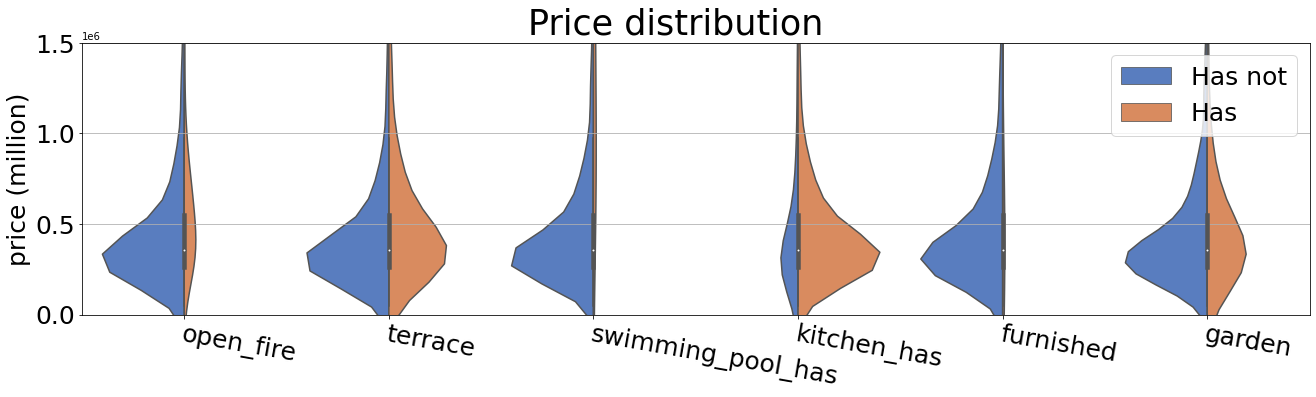

In [131]:
house_mask = df_boolean_melted_typed.house_is == 'Has'
house_flanders_mask = house_mask & (df_boolean_melted_typed.region == 'Flanders')

fig, ax = plt.subplots(figsize=(22,5))

ax = sns.violinplot(x="variable", y="price", hue="value",
                    data=df_boolean_melted_typed[house_flanders_mask], palette="muted",
                   inner = 'box', scale = 'count', hue_order = ['Has not', 'Has'], split = True)

ax.set_ylabel('price (million)', fontsize = 25)
ax.set_xlabel('')
ax.tick_params(axis='both', which='major', labelsize = 25)
ax.axis([None, None, 0, 1500000])
ax.grid(axis = 'y')
ax.legend(loc = 'upper right', fontsize = 25)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=-10, ha="left", rotation_mode="anchor")

fig.suptitle('Price distribution', fontsize=35)

plt.savefig('./pictures/boolean_cor_house_flanders.png', transparent=True)
plt.show()